In [3]:
import cv2
import requests
import matplotlib.pyplot as plt
import torch
from skimage import io
from PIL import Image
from SimpleHRNet import SimpleHRNet


In [2]:
import sys
sys.path.append("/Users/student/KIRILLZ/PR/simple-HRNet")

In [15]:
weight_path = "/Users/student/KIRILLZ/PR/simple-HRNet/weights/pose_hrnet_w32_256x192.pth"

device = torch.device('cpu')


model = SimpleHRNet(32, 17, weight_path,  yolo_version='v5', yolo_model_def='yolov5n', multiperson=False, device=device)

url = 'https://qph.cf2.quoracdn.net/main-qimg-7766c2eaa3854674797d1ded61a50c01-lq'
image_path = '/Users/student/KIRILLZ/PR/image.jpeg'
image = io.imread(image_path)

joints = model.predict(image)


device: 'cpu'


TypeError: scatter() got multiple values for argument 'x'

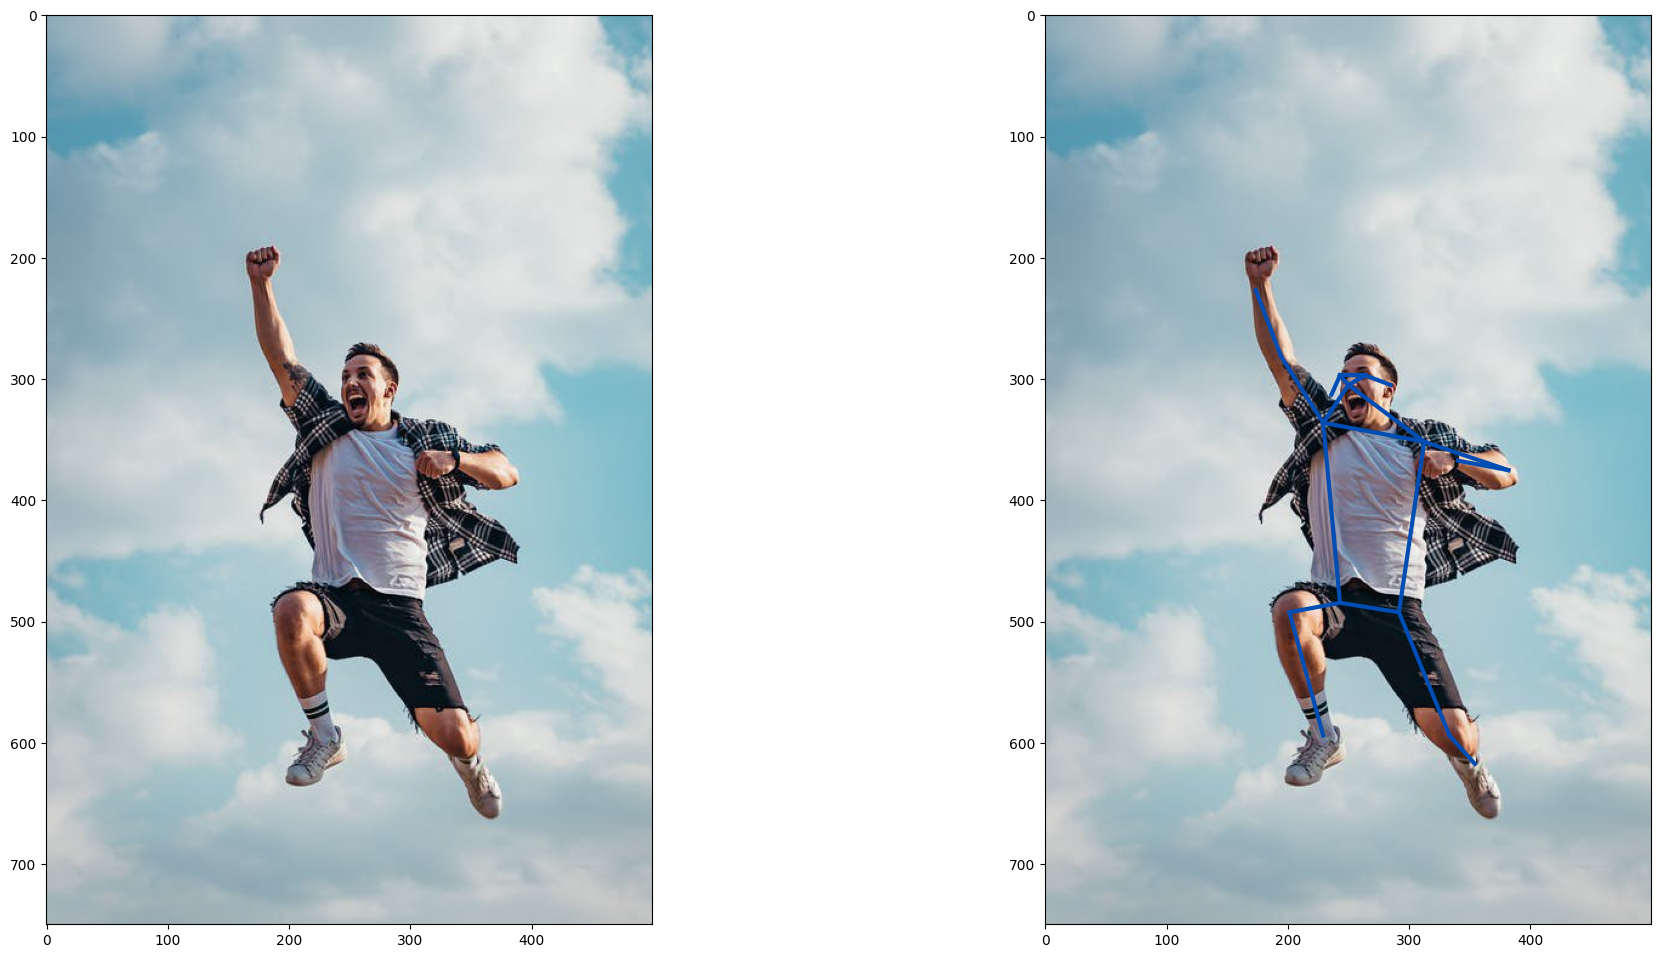

In [17]:
%matplotlib inline
from misc.visualization import joints_dict

def plot_joints(ax, output):
    bones = joints_dict()["coco"]["skeleton"]

    for bone in bones:
        xs = [output[:, bone[0], 1], output[:, bone[1], 1]]
        ys = [output[:, bone[0], 0], output[:, bone[1], 0]]
        ax.plot(xs, ys, linewidth=3, c=(0, 0.3, 0.7))
    ax.scatter(joints[:,:,1], joints[:,:,0], s=20, x='b')

fig = plt.figure(figsize=(60/2.54, 30/2.54))
ax = fig.add_subplot(121)
ax.imshow(Image.open(requests.get(url, stream=True).raw))
ax = fig.add_subplot(122)
ax.imshow(Image.open(requests.get(url, stream=True).raw))
plot_joints(ax, joints)
plt.show()